### 목표
 - 환자 데이터를 바탕으로 유방암인지 아닌지를 구분해보자!(2진분류)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
X = data.data
y = data.target

In [4]:
X.shape, y.shape

((569, 30), (569,))

In [5]:
# 최종 평가까지 직접 해보세요~!

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# 1. 신경망 구조 설계
model = Sequential()

# 입력층 + 중간층
# relu : 최근에 가장 많이 사용하는 성능 좋은 활성화함수
model.add(Dense(200, input_dim=30, activation='relu'))

# 중간층(은닉층)
model.add(Dense(100, activation='relu'))    # 하나의 층
model.add(Dense(50, activation='relu'))    # 하나의 층
model.add(Dense(10, activation='relu'))     # 하나의 층

# 출력층
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               6200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 31,871
Trainable params: 31,871
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 2. 학습/평가방법 설정
model.compile(loss='binary_crossentropy',
              optimizer='Adam',       # 최근에 가장 많이 사용되는 최적화 함수
              metrics=['acc']        
             )

In [11]:
# 3. 학습
h = model.fit(X_train, y_train,
              epochs=100        # 학습 횟수 설정
             )

Epoch 1/100
14/14 [==============================] - 0s 641us/step - loss: 3.4593 - acc: 0.6362
Epoch 2/100
14/14 [==============================] - 0s 499us/step - loss: 0.5630 - acc: 0.8545
Epoch 3/100
14/14 [==============================] - 0s 570us/step - loss: 0.5011 - acc: 0.8592
Epoch 4/100
14/14 [==============================] - 0s 499us/step - loss: 0.5293 - acc: 0.8427
Epoch 5/100
14/14 [==============================] - 0s 641us/step - loss: 0.2559 - acc: 0.9131
Epoch 6/100
14/14 [==============================] - 0s 499us/step - loss: 0.2966 - acc: 0.8920
Epoch 7/100
14/14 [==============================] - 0s 499us/step - loss: 0.3417 - acc: 0.8873
Epoch 8/100
14/14 [==============================] - 0s 570us/step - loss: 0.2398 - acc: 0.9085
Epoch 9/100
14/14 [==============================] - 0s 570us/step - loss: 0.2206 - acc: 0.9085
Epoch 10/100
14/14 [==============================] - 0s 499us/step - loss: 0.2685 - acc: 0.9061
Epoch 11/100
14/14 [===================

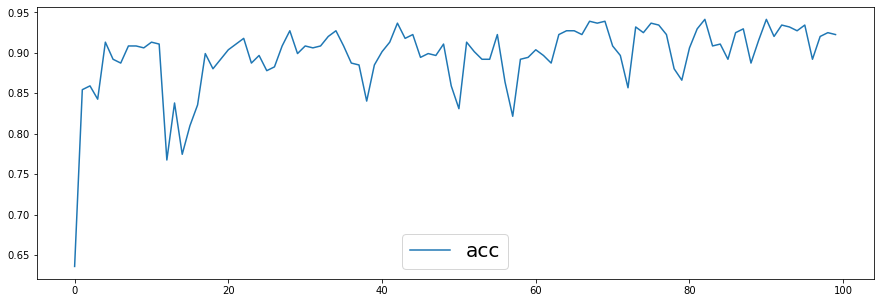

In [12]:
# 3. 시각화
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')    

plt.legend(prop={'size':20}, loc='lower center')
plt.show()

In [13]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 529us/step - loss: 0.1258 - acc: 0.9580


[0.12581945955753326, 0.9580419659614563]